In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold,cross_val_score,GridSearchCV

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
A=pd.read_csv('/content/drive/My Drive/Case Studies Mahesh Anand/wine.xls',names = 
              ["Cultivator", "Alchol", "Malic_Acid", "Ash", "Alcalinity_of_Ash", 
             "Magnesium", "Total_phenols", "Flavanoids", "Nonflavanoid_phenols", 
             "Proanthocyanins", "Color_intensity", "Hue", "OD280", "Proline"])
A.head()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
A.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Flavanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


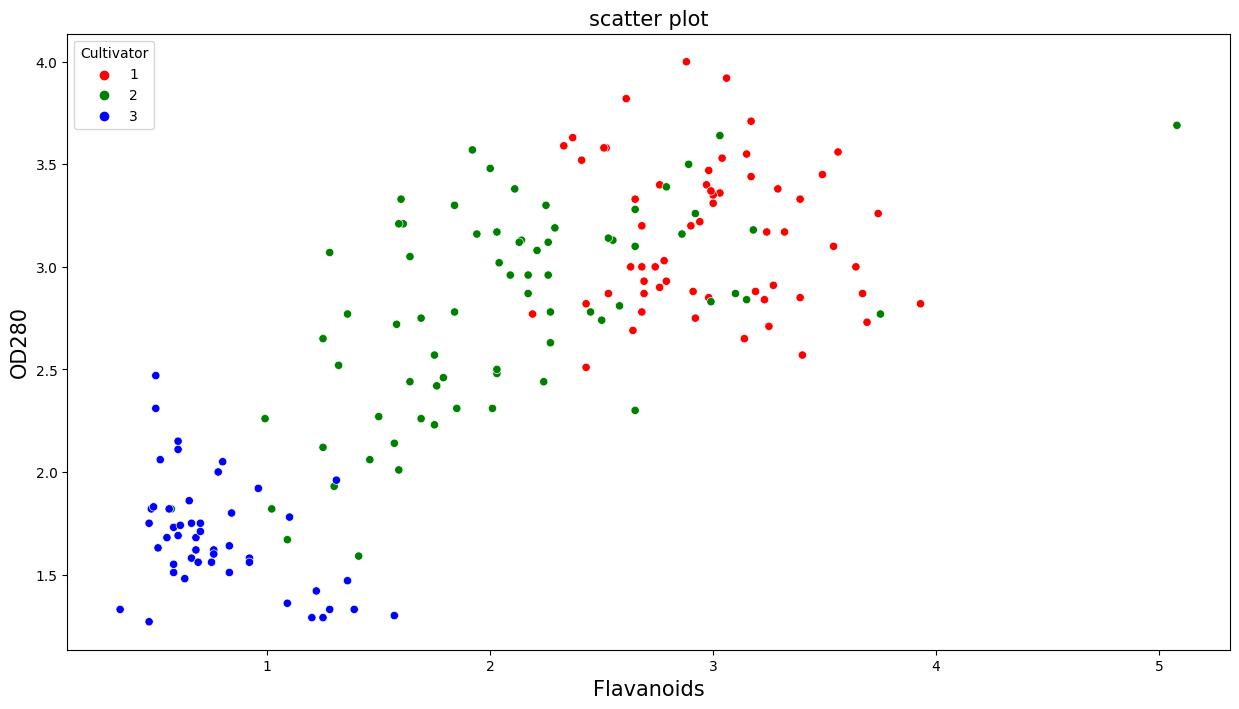

In [5]:
# plot the scatterplot to visualize the clusters
plt.rcParams['figure.figsize'] = [15,8]
sns.scatterplot(x = 'Flavanoids', y = 'OD280', data = A, hue = 'Cultivator',palette=['red','green','blue'])

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('scatter plot', fontsize = 15)
plt.xlabel('Flavanoids', fontsize = 15)
plt.ylabel('OD280', fontsize = 15)

# display the plot
plt.show()

In [ ]:
A.shape

(178, 14)

In [7]:
#3D plot using Plotly
import plotly.express as px
fig = px.scatter_3d(A, x='Flavanoids', y='OD280', z='Alchol',color=A['Cultivator'])
fig.show()

In [ ]:
A['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [ ]:
A.corr()

,Cultivator,Alchol,Malic_Acid,Ash,Alcalinity_of_Ash,Magnesium,Total_phenols,Falvanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,OD280,Proline
Cultivator,1.000000,-0.328222,0.437776,-0.049643,0.517859,-0.209179,-0.719163,-0.847498,0.489109,-0.499130,0.265668,-0.617369,-0.788230,-0.633717
Alchol,-0.328222,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720
Malic_Acid,0.437776,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011
Ash,-0.049643,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626
Alcalinity_of_Ash,0.517859,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597
Magnesium,-0.209179,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351
Total_phenols,-0.719163,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115
Falvanoids,-0.847498,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193
Nonflavanoid_phenols,0.489109,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385
Proanthocyanins,-0.499130,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417


In [ ]:
from scipy.stats import f_oneway

In [ ]:
g1=A[A['Cultivator']==1]
g2=A[A['Cultivator']==2]
g3=A[A['Cultivator']==3]

In [ ]:
g1.shape,g2.shape,g3.shape

((59, 14), (71, 14), (48, 14))

In [ ]:
A['Cultivator'].value_counts()

2    71
1    59
3    48
Name: Cultivator, dtype: int64

In [ ]:
f_oneway(g1['Ash'],g2['Ash'],g3['Ash'])

F_onewayResult(statistic=13.312901199991039, pvalue=4.149967974793239e-06)

In [ ]:
f_oneway(g1['Magnesium'],g2['Magnesium'],g3['Magnesium'])


F_onewayResult(statistic=12.4295843381499, pvalue=8.963395439251042e-06)

In [ ]:
X=A.drop('Cultivator',axis=1)
Y=A['Cultivator']

In [ ]:
p_val=[]
for col in X.columns:
  res=f_oneway(g1[col],g2[col],g3[col])
  p_val.append(res[1])
print(p_val)

[3.319503795619655e-36, 4.127228798041834e-14, 4.149967974793239e-06, 9.444472938826817e-14, 8.963395439251042e-06, 2.1376700154385954e-28, 3.5985858307136404e-50, 3.88804090047893e-11, 5.125358737546706e-12, 1.162008021927618e-33, 5.9176622163620664e-30, 1.393104956942896e-44, 5.783168356105498e-47]


In [ ]:
sc=StandardScaler()
X_std=sc.fit_transform(X)

In [ ]:
LR=LogisticRegression()
NB=GaussianNB()

In [ ]:
from sklearn.model_selection import cross_val_score,KFold

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(LR,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9658192090395481, 0.05920286658639382)

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(NB,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9490931320063195, 0.00031152756735189824)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn=KNeighborsClassifier()
params={'n_neighbors':np.arange(1,50),'weights':['uniform','distance']}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(knn,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['uniform', 'distance']},
             scoring='f1_weighted')

In [ ]:
GS.best_params_

{'n_neighbors': 13, 'weights': 'uniform'}

In [ ]:
knn_tuned=KNeighborsClassifier(n_neighbors=13,weights='uniform')
score=cross_val_score(knn_tuned,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9771099712558232, 0.039646692771626336)

In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
knn_be=[]
knn_ve=[]
for i in np.arange(1,100):
  knn_bag=BaggingClassifier(base_estimator=knn_tuned,n_estimators=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(knn_bag,X_std,Y,scoring='f1_weighted')
  knn_be.append(np.mean(1-scores))
  knn_ve.append(np.std(scores,ddof=1))

In [ ]:
np.argmin(knn_ve),np.min(knn_ve),1-knn_be[1]

(1, 0.02389905868431274, 0.94887375653567)

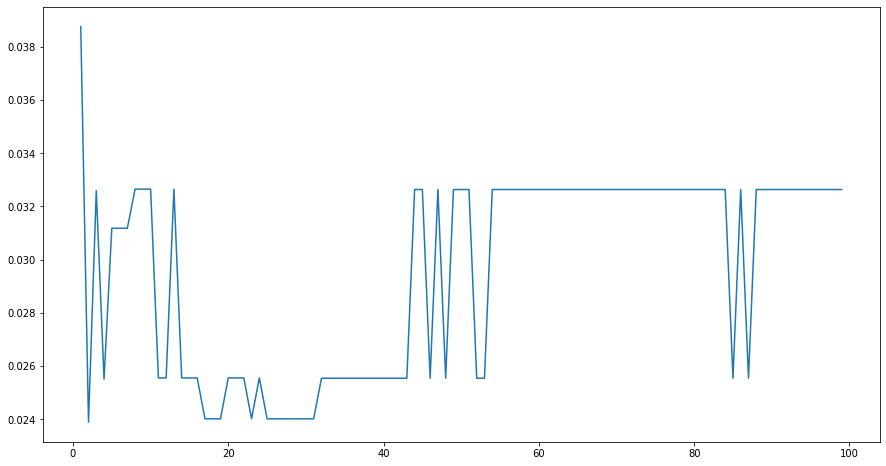

In [ ]:
x_axis=np.arange(1,100)
plt.plot(x_axis,knn_ve)

In [ ]:
from sklearn import metrics

In [ ]:
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system
train_char_label = ['cult1', 'cult2','cult3']
DT_Tree_File = open('/content/drive/My Drive/Python for ML-Mahesh Anand/Wine_tree.dot','w')
dot_data = tree.export_graphviz(DT, out_file=DT_Tree_File, feature_names = list(xtrain), class_names = list(train_char_label))

DT_Tree_File.close()

In [ ]:
print (pd.DataFrame(DT.feature_importances_, columns = ["Imp"], index = X.columns))

                           Imp
Alchol                0.000000
Malic_Acid            0.000000
Ash                   0.023891
Alcalinity_of_Ash     0.000000
Magnesium             0.020361
Total_phenols         0.000000
Flavanoids            0.417538
Nonflavanoid_phenols  0.000000
Proanthocyanins       0.000000
Color_intensity       0.406217
Hue                   0.000000
OD280                 0.000000
Proline               0.131994


In [ ]:
X['Hue'].std()

0.22857156582982338

In [ ]:
np.std(X['Hue'],ddof=1)

0.22857156582982338

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
DT_be=[]
DT_ve=[]
for i in np.arange(1,10):
  DT=DecisionTreeClassifier(max_depth=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(DT,X,Y,scoring='f1_weighted')
  DT_be.append(np.mean(1-scores))
  DT_ve.append(np.std(scores,ddof=1))

In [ ]:
np.argmin(DT_ve),np.min(DT_ve)

(3, 0.04505939965705464)

In [ ]:
DT_tuned=DecisionTreeClassifier(max_depth=4,random_state=0)

In [ ]:
RF_be=[]
RF_ve=[]
for i in np.arange(1,100):
  RF=RandomForestClassifier(criterion='gini',n_estimators=i,random_state=0)
  kf=KFold(n_splits=3,shuffle=True,random_state=0)
  scores=cross_val_score(RF,X_std,Y,scoring='f1_weighted')
  RF_be.append(np.mean(1-scores))
  RF_ve.append(np.std(scores,ddof=1))

In [ ]:
np.argmin(RF_ve),np.min(RF_ve)

(60, 0.012680068860603404)

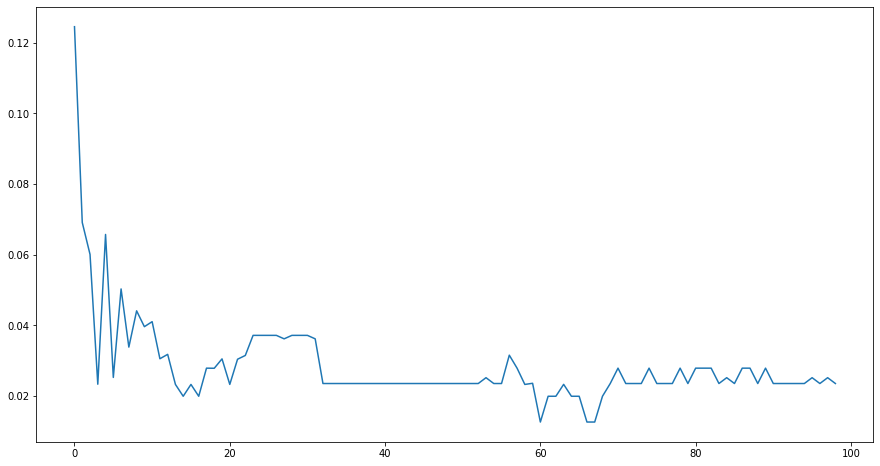

In [ ]:
X_axis=np.arange(len(RF_ve))
plt.plot(X_axis,RF_ve)

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(DT_tuned,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.903885356789333, 0.043995981697500755)

In [ ]:
RF_tuned=RandomForestClassifier(criterion='gini',n_estimators=61,random_state=0)

In [ ]:
kf=KFold(n_splits=3,shuffle=True,random_state=0)
score=cross_val_score(RF_tuned,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9661015286438567, 0.03404757699686401)

In [ ]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [ ]:
Ab=AdaBoostClassifier(random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [ ]:
GS.best_params_

{'n_estimators': 10}

In [ ]:
Ab_dt=AdaBoostClassifier(n_estimators=10,random_state=0)

In [ ]:
score=cross_val_score(Ab_dt,X_std,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9098709080506411, 0.02061879371839874)

In [ ]:
#Let us boost the LR model
Ab=AdaBoostClassifier(base_estimator=LR,random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=3)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=LogisticRegression(),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [ ]:
GS.best_params_

{'n_estimators': 7}

In [ ]:
#Let us boost the NB model
Ab=AdaBoostClassifier(base_estimator=NB,random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=3)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=3, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=GaussianNB(),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [ ]:
GS.best_params_

{'n_estimators': 92}

* n_estimator=1 indicates there is no scope for boosting

In [ ]:
Ab_NB=AdaBoostClassifier(base_estimator=NB,n_estimators=92,random_state=0)

In [ ]:
Ab_LR=AdaBoostClassifier(base_estimator=LR,n_estimators=7,random_state=0)

In [ ]:
score=cross_val_score(Ab_dt,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

In [ ]:
score=cross_val_score(Ab_LR,X,Y,cv=kf,scoring='f1_weighted')
np.mean(score),np.std(score,ddof=1)

(0.9443081826398236, 0.034443600924225784)

In [ ]:
#Let us boost the RF model
Ab=AdaBoostClassifier(base_estimator=RF_tuned,random_state=0)
params={'n_estimators':np.arange(1,50)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(Ab,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=61,
                                                                                random_state=0),
                                          random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
             scoring='f1_weighted')

In [ ]:
GS.best_params_

{'n_estimators': 1}

no scope for boosting Rf

In [ ]:
GB=GradientBoostingClassifier(random_state=0)
params={'n_estimators':np.arange(1,100)}
kf=KFold(n_splits=3,shuffle=True,random_state=0)
GS=GridSearchCV(GB,params,cv=kf,scoring='f1_weighted')
GS.fit(X_std,Y)

GridSearchCV(cv=KFold(n_splits=3, random_state=0, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=0),
             param_grid={'n_estimators': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])},
             scoring='f1_weighted')

In [ ]:
GS.best_params_

{'n_estimators': 14}

In [ ]:
GB_tuned=GradientBoostingClassifier(n_estimators=14,random_state=0)

In [ ]:
from sklearn.ensemble import VotingClassifier
Stacked = VotingClassifier(estimators = [('BoostedLR',Ab_LR),
                                         ('RandomForest', RF_tuned), 
                                         ('GBoost',GB_tuned)],voting='soft')

In [ ]:
from sklearn.ensemble import StackingClassifier
from xgboost import XGBClassifier

In [ ]:
XGB=XGBClassifier(gamma=2, learning_rate=0.1,max_depth=2,n_estimators=100)

In [ ]:
base_learners = [('Boosted_LR', Ab_LR),('Random Forest', RF_tuned)]
stack_model = StackingClassifier(estimators = base_learners,final_estimator=GB_tuned)

In [ ]:
models = []
models.append(('Logistic', LR))
models.append(('NaiveBayes', NB))
models.append(('KNN',knn_tuned))
models.append(('DecisionTree',DT_tuned))
models.append(('RandomForest',RF_tuned))
models.append(('BoostedDT',Ab_dt))
models.append(('BoostedLR',Ab_LR))
models.append(('BoostedNB',Ab_NB))
models.append(('GBoost',GB_tuned))
models.append(('VotingC',Stacked))
models.append(('StackingC',stack_model))
models.append(('XGBoost',XGB))

Logistic: 0.965819 (0.059203)
NaiveBayes: 0.949093 (0.000312)
KNN: 0.977110 (0.039647)
DecisionTree: 0.903885 (0.043996)
RandomForest: 0.966102 (0.034048)
BoostedDT: 0.909871 (0.020619)
BoostedLR: 0.977268 (0.026103)
BoostedNB: 0.886849 (0.019966)
GBoost: 0.943902 (0.019483)
VotingC: 0.971930 (0.019564)
StackingC: 0.977566 (0.025822)
XGBoost: 0.955007 (0.025903)


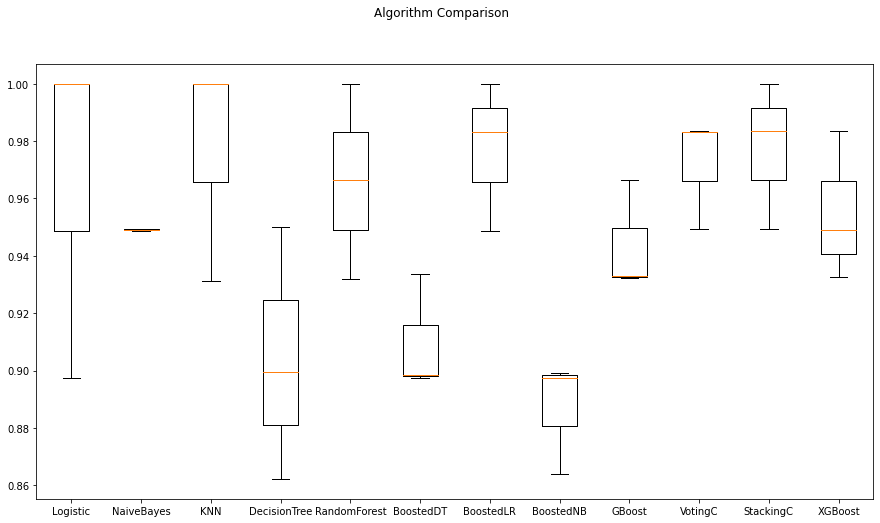

In [ ]:
# evaluate each model in turn
results = []
names = []
for name, model in models:
	kfold = KFold(shuffle=True,n_splits=3,random_state=0)
	cv_results = cross_val_score(model, X_std, Y,cv=kfold, scoring='f1_weighted')
	results.append(cv_results)
	names.append(name)
	print("%s: %f (%f)" % (name, np.mean(cv_results),np.std(cv_results,ddof=1)))
#print(results)
   # boxplot algorithm comparison
plt.rcParams['figure.figsize'] = [15,8]
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
(0.977566-0.971930)/0.977566

0.005765339629242512

In [ ]:
(0.025822-0.019564)/0.025822

0.24235148323135308

In [ ]:
((0.977566-0.971930)/0.977566)*100

0.5765339629242512

In [ ]:
((0.025822-0.019564)/0.025822)*100

24.23514832313531

In [ ]:
(0.977566-0.971930)/0.977566

0.005765339629242512

In [ ]:
(.026103-0.019564)/0.026103

0.25050760448990533